In [5]:
from pandas_datareader import data, wb # to read stock data directly from internet
import pandas as pd
import numpy as np
import datetime # to set the duration period from start to end
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Extracting Data:

In [6]:
# we need to extract data from web
# so we'll do the stock information from the following banks
# - Bank of America
# - CitiGroup
# - Goldman Sachs
# - JPMorgan Chase
# - Morgan Stanley
# - Wells Fargo

# Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:

# 1. Use datetime to set start and end datetime objects.
# 2. Figure out the ticker symbol for each bank.
# 3. Figure out how to use datareader to grab info on the stock.

In [12]:
# now let's go ahead and make a ticker for our first bank 'Bank of America' and save our dataframe
# inside that ticker variable using DataReader
# Remeber! we are using "yahoo finance" to grab the data for these banks

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [13]:
# we can also pass in the list of banks to grab data from

df = data.DataReader('BAC C GS JPM MS WFC'.split(), 'yahoo', start, end)

### Basic Questions:

In [14]:
# Create this list of all the tickers?

tickers = 'BAC C GS JPM MS WFC'.split()

In [15]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [19]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,36.147552
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.763645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.809727
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.755962
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.779007


In [32]:
# Create one single dataframe of all sub dataframes and set hierarcheal index to be 'tickers'

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers) # keys contruct hierarcheal index

In [33]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  36.147552   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.763645   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.809727   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.755962   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.779007   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.834549  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.861198  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.967754  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  39.007713  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  39.420616  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.693670  
2006-01-04  31.530001  10870000.0  21.442055  
2006-01-05  31.495001  10158000.0  21.418251  
2006-01-06  31.680000   8403800.0  21.544062  
2006-01-09  31.674999   5619600.0  21.540665  

[5 rows x 36 columns]

In [36]:
# Set the hierarcheal column names to be 'Bank Ticker' and 'Stock Info'?

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [37]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   36.147552  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.763645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.809727  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.755962  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.779007  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.834549  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.861198  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.967754  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  39.007713  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.420616  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.693670  
2006-01-04   31.799999  31.530001  10870000.0  21.442055  
2006-01-05   31.500000  31.495001  10158000.0  21.418251  
2006-01-06   31.580000  31.680000   8403800.0  21.544062  
2006-01-09   31.674999  31.674999   5619600.0  21.540665  

[5 rows x 36 columns]

In [38]:
# What is the max Close price for each bank's stock throughout the time period?

bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [41]:
bank_stocks.xs(level = 'Stock Info', key = 'Low', axis = 1).min() # reports back the minimum values

# for every bank this whole duration

Bank Ticker
BAC     2.53
C       9.70
GS     47.41
JPM    14.96
MS      6.71
WFC     7.80
dtype: float64

In [43]:
# Create a new empty DataFrame returns?

returns = pd.DataFrame()

In [44]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value. 
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

# pct_change() method here calculates the percentage change in current and previous values

for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [45]:
type(returns)

pandas.core.frame.DataFrame

C:\Users\umair\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\umair\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


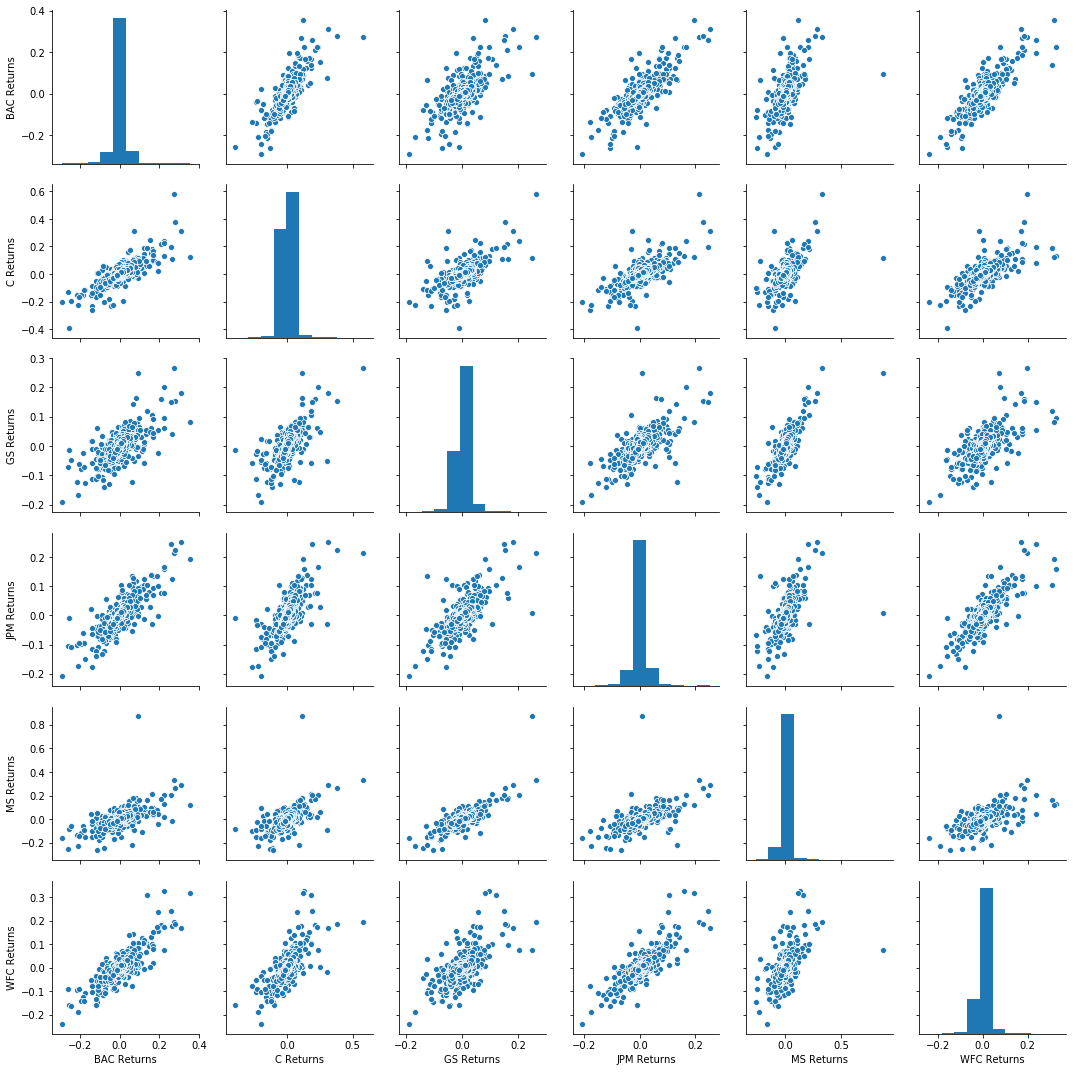

In [46]:
# Create a pairplot using seaborn of the returns dataframe.
# What stock stands out to you? Can you figure out why?

sns.pairplot(data = returns)

In [47]:
# from above plot we can see that almost every value with respect to other values tend to increase
# almost linerly with one another

In [52]:
# Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

returns.idxmin() # reports back first accurance of minimun over requested axis

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [53]:
returns.idxmax() # returns first accurance of maximum over requested axis

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [54]:
# Take a look at the standard deviation of the returns DataFrame?

returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [56]:
# over a period of 1 year find the standard deviaton of returns DataFrame
# take year from 2015-1-1 to 2015-12-31

returns.ix['2015-01-01':'2015-12-31'].std()

# .ix --> to grab the chunk of date

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'MS Returns')

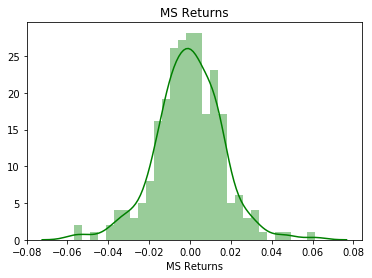

In [60]:
# Create a distplot using seaborn of the 2015 returns for Morgan Stanley?

sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Returns'], color = 'green', bins = 30)
plt.title('MS Returns')

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


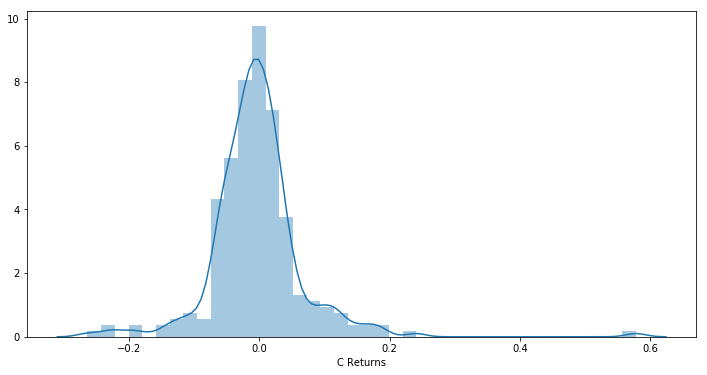

In [66]:
# Create a distplot using seaborn of the 2008 returns for CitiGroup?

plt.figure(figsize = (12,6))
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Returns'], bins = 40)

### Some More Data Visuazliation:

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

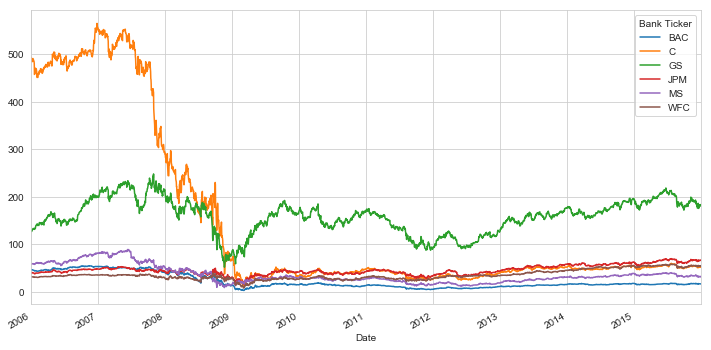

In [77]:
# Create a line plot showing Close price for each bank for the entire index of time?

bank_stocks.xs(level = 'Stock Info', key = 'Close', axis = 1).plot(figsize = (12,6))

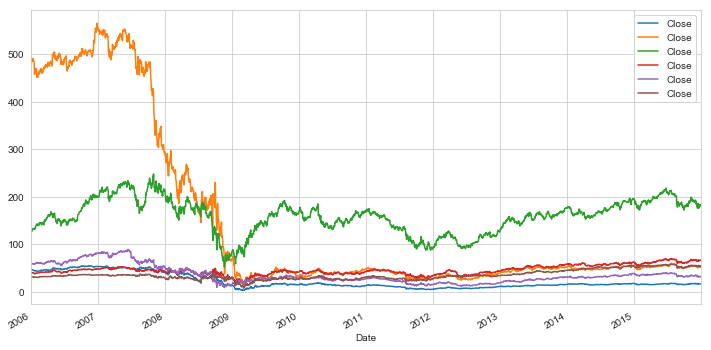

In [114]:
# we can also apply for loop to show this plot

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (12,6), legend = tick)
    
plt.legend()
plt.savefig('plot003.png', dpi = 200)

In [113]:
# create the same plot using plotly?
# reports back the closing index record from recent year for multiple banks.

bank_stocks.xs(level = 'Stock Info', key = 'Close', axis = 1).iplot()
plt.savefig('plot95.png', dpi = 200)

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


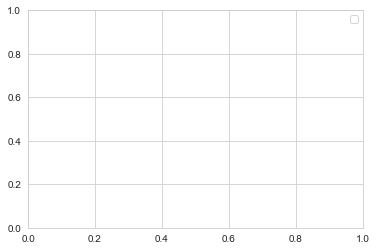

In [88]:
# using for loop..

for tick in tickers:
    bank_stocks[tick]['Close'].iplot()
    
plt.legend()

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



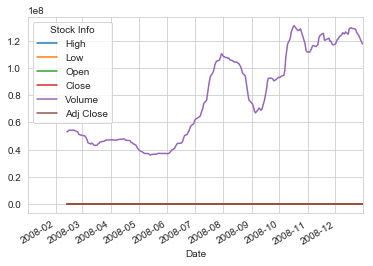

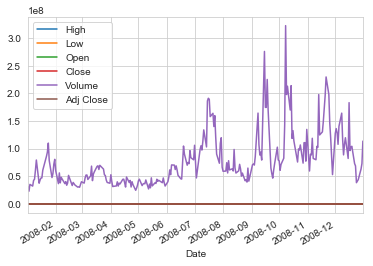

In [95]:
# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008?

bank_stocks['BAC'].ix['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Days Average')
bank_stocks['BAC'].ix['2008-01-01':'2008-12-31'].plot(legend = 'BAC Close')
plt.legend()

plt.savefig('StockIndex', dpi = 200)

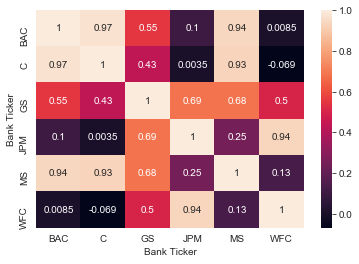

In [98]:
# Create a heatmap of the correlation between the stocks Close Price.

sns.heatmap(data = bank_stocks.xs(level = 'Stock Info', key = 'Close', axis = 1).corr(), annot = True)

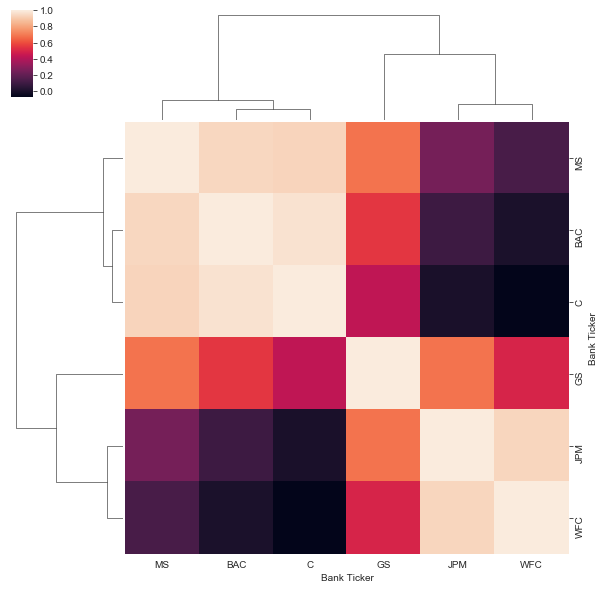

In [100]:
# Create a clustermap of the correlation between the stocks Close Price.

sns.clustermap(bank_stocks.xs(level = 'Stock Info', key = 'Close', axis = 1).corr())

In [101]:
# using plotly

bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr().iplot()

In [104]:
close_corr = bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr()
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

### Data Visualizations using Cufflinks:

In [105]:
# Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

bank_stocks['BAC'].ix['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [109]:
# Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015?

MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [110]:
# Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015?

BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [115]:
# that is all
# umairgillani93@gmail.com
# umairgillani (UG_PYTHON)